# Pandas Demo

**Python Meetup**

[Damien Garaud](https://twitter.com/jazzydag)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
print("pandas version {}".format(pd.__version__))

pandas version 0.19.1


In [73]:
import seaborn as sns
sns.set_context('talk')

## Pandas

**{Pan}el {Da}ta Analysis**

* Python & Numpy
* Performant (cython)
* IT Quant / Orienté Finance (initialement)

* Fonctionnalités

  * données en 1D, 2D et 3D
  * lecture/écriture sur CSV, Excel, base de données, hdf5, json, ...
  * group-by, merge, join
  * séries temporelles & valeurs manquantes

* `DataFame`
  * tableau 2D : matrice, table SQL, fichier CSV, feuille Excel
  * un type de données par colonne : entier, double, chaîne de caractères, date, ...

**Plan / Points abordés**

* lecture de données
* type de données
* sélection de données
* indicateurs statistiques
* appliquer une fonction à une/des colonne(s)
* groupby
* tracer quelques figures
* enchaîner des appels de fonction
* séries temporelles
* en bonus : un peu de machine learning

**Note** : les données viennent de https://archive.ics.uci.edu/ml/index.html (Machine Learning Repository)

## First baby step

In [3]:
# p'tit DataFrame, tranquillou
dates = ["2016-10-11", "2016-11-09", "2016-09-09", "2016-10-19"]
df = pd.DataFrame({"name": ['john', 'alice', 'bob', 'jane'],
                   "age": [34, 56, 31, 24],
                   "subs": [True, True, False, True],
                   "logged": [pd.Timestamp(x) for x in dates]})

In [4]:
df

,age,logged,name,subs
0,34,2016-10-11,john,True
1,56,2016-11-09,alice,True
2,31,2016-09-09,bob,False
3,24,2016-10-19,jane,True


In [5]:
df.dtypes

age                int64
logged    datetime64[ns]
name              object
subs                bool
dtype: object

## Contraceptive Methods

Sondage à propos de la méthode contraceptive des femmes indiennes.

**Data Set Information**:

   > This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

* https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
* http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data

### Récupérer les données

In [6]:
# Comma Separated Values
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"
fname = "data/cmc.data"

In [7]:
!head data/cmc.data

24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1
19,4,4,0,1,1,3,3,0,1
38,2,3,6,1,1,3,2,0,1
21,3,3,1,1,0,3,2,0,1
27,2,3,3,1,1,3,4,0,1
45,1,1,8,1,1,2,2,1,1


In [8]:
# 10 colonnes
cmc_names = ['age', 'education', 'husband_education', 'children', 'religion', 'working',
             'husband_occupation', 'living_index', 'media', 'method']

On peut lire un fichier CSV depuis un fichier **mais aussi depuis une URL**

In [9]:
# lire des données
cmc = pd.read_csv(url, names=cmc_names, header=None)

### Sélection / info / description

Cinq premières lignes du fichier.

In [10]:
# Premières lignes
cmc.head()

,age,education,husband_education,children,religion,working,husband_occupation,living_index,media,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


```
Attribute Information:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term
```

Je veux juste une colonne

In [11]:
# sélection de colonne: 'age'
cmc['age'].head()

0    24
1    45
2    43
3    42
4    36
Name: age, dtype: int64

Je veux sélectionner plusieurs colonnes

In [12]:
# sélection de plusieurs colonnes : 'education' et 'children'
cmc[['education', 'children']].sample(5)

,education,children
15,2,0
66,4,8
1340,2,3
594,4,4
452,3,1


In [13]:
# sélectionner toutes les lignes où le nombre d'enfants est supérieur à 5
cmc.query("children > 5").head()

,age,education,husband_education,children,religion,working,husband_occupation,living_index,media,method
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
6,38,2,3,6,1,1,3,2,0,1


In [14]:
# combien de femmes ont plus de 5 enfants ?
cmc.query("children > 5").shape, cmc.shape

((233, 10), (1473, 10))

In [15]:
# quelques infos rapides sur mes données
cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
age                   1473 non-null int64
education             1473 non-null int64
husband_education     1473 non-null int64
children              1473 non-null int64
religion              1473 non-null int64
working               1473 non-null int64
husband_occupation    1473 non-null int64
living_index          1473 non-null int64
media                 1473 non-null int64
method                1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


In [16]:
# quelques statistiques sur les données numériques
cmc[['age', 'children']].describe()

,age,children
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


### Fouiller un peu

**Combien de valeurs uniques par colonne ?**

In [17]:
# je veux appliquer le compte d'éléments unique par colonne
cmc['education'].unique()
cmc['education'].nunique()
cmc.apply(pd.Series.nunique).sort_values(ascending=False)

age                   34
children              15
living_index           4
husband_occupation     4
husband_education      4
education              4
method                 3
media                  2
working                2
religion               2
dtype: int64

**L'âge et le nombre d'enfants par méthode contraceptive**

Présentation du `group-by`.

In [18]:
# l'âge moyen et le nombre d'enfants moyen par méthode contraceptive
cmc.groupby("method")[['age', 'children']].mean()

,age,children
method,,
1,33.424483,2.934817
2,34.384384,3.738739
3,30.244618,3.352250


**Corrélation** entre les données

Exemple très simples de corrélation : la pluie et les parapluies

In [19]:
# calcul de la corrélation entre toutes les colonnes
cmc.corr()

,age,education,husband_education,children,religion,working,husband_occupation,living_index,media,method
age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953
education,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777
husband_education,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226
children,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772
religion,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271
working,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438
husband_occupation,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161
living_index,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149
media,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206
method,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000


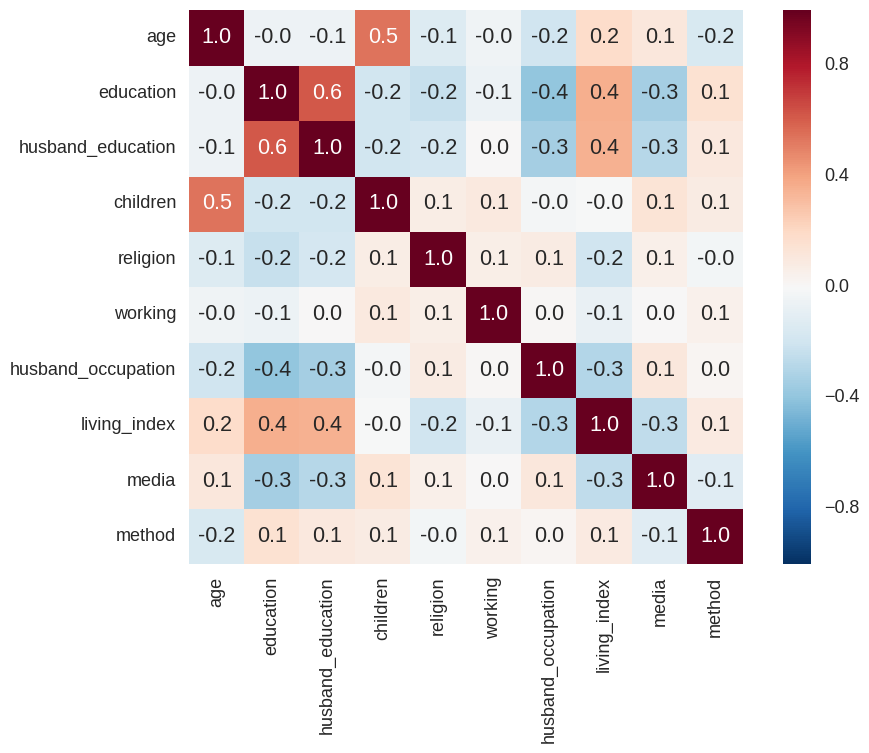

In [20]:
# et si je veux afficher mes belles corrélations ? 
sns.heatmap(cmc.corr(), square=True, annot=True, fmt=".1f")

### Un peu prédiction

Jouons un peu avec scikit-learn.

Que pourrait-on **prédire** sur ce jeu de données ??

In [74]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

On prend d'un côté les *features* et de l'autre la valeur à prédire (i.e. `method`)

In [22]:
# récupérons les features, les 'X', les variables d'entrée
X = cmc.drop('method', axis=1).values

In [23]:
# récupérons la colonne des valeurs à prédire => méthode contraceptive
y = cmc['method'].values

In [24]:
# on mélange tout ça pour voir un jeu d'entraînement et un jeu de test pour la validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
                                                                     stratify=y,
                                                                     random_state=22)

In [25]:
# Modèle pour la classification
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [26]:
# on entraine le modèle sur le jeu... d'entraînement
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [27]:
# et on demande à prédire sur le jeu de test : méthode contraceptive 1, 2 ou 3
tree.predict(X_test)

array([1, 2, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3,
       1, 1, 3, 2, 2, 3, 3, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1,
       3, 3, 2, 1, 1, 3, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 3, 2, 3, 3, 2, 1, 3, 1, 2, 1, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 1, 1,
       2, 1, 1, 2, 3, 3, 2, 1, 3, 3, 3, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 2, 1, 1, 3, 3, 1, 1, 1, 3, 2, 3, 2, 1, 3, 1, 2, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 1, 3, 2, 1, 3, 2, 3, 1, 3, 1, 3,
       1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 3, 1, 3, 2, 1, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 3, 3, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1, 3, 3, 2, 1, 2, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 2, 2, 2, 1, 3, 1, 1, 2, 2, 1, 3,
       3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1,
       3, 1,

In [28]:
# on calcule le score de notre modèle sur le jeu de test
tree.score(X_test, y_test)

0.52303523035230348

Essayons d'améliorer ce score en ajoutant une *feature*.

In [29]:
# copie du DataFrame précédent
cmc2 = cmc.copy()

In [30]:
# ratio age/children
cmc2['age_child'] = cmc2['age'] / cmc2['children']

In [31]:
# remplacer toutes les valeurs 'inf'
cmc2.loc[cmc2.children == 0, 'age_child'] = cmc2['age']
cmc2.head(5)

,age,education,husband_education,children,religion,working,husband_occupation,living_index,media,method,age_child
0,24,2,3,3,1,1,2,3,0,1,8.000000
1,45,1,3,10,1,1,3,4,0,1,4.500000
2,43,2,3,7,1,1,3,4,0,1,6.142857
3,42,3,2,9,1,1,3,3,0,1,4.666667
4,36,3,3,8,1,1,3,2,0,1,4.500000


In [32]:
# on reprend les mêmes X et y, et on recommence
X_2, y_2 = cmc2.drop('method', axis=1).values, cmc2['method'].values

In [33]:
# séparer jeu d'entraînement et jeu de test
X2_train, X2_test, y2_train, y2_test = cross_validation.train_test_split(X_2, y_2,
                                                                         stratify=y,
                                                                         random_state=22)

In [34]:
# predict & score
tree.fit(X2_train, y2_train)
tree.predict(X2_test)
tree.score(X2_test, y2_test)

0.54742547425474253

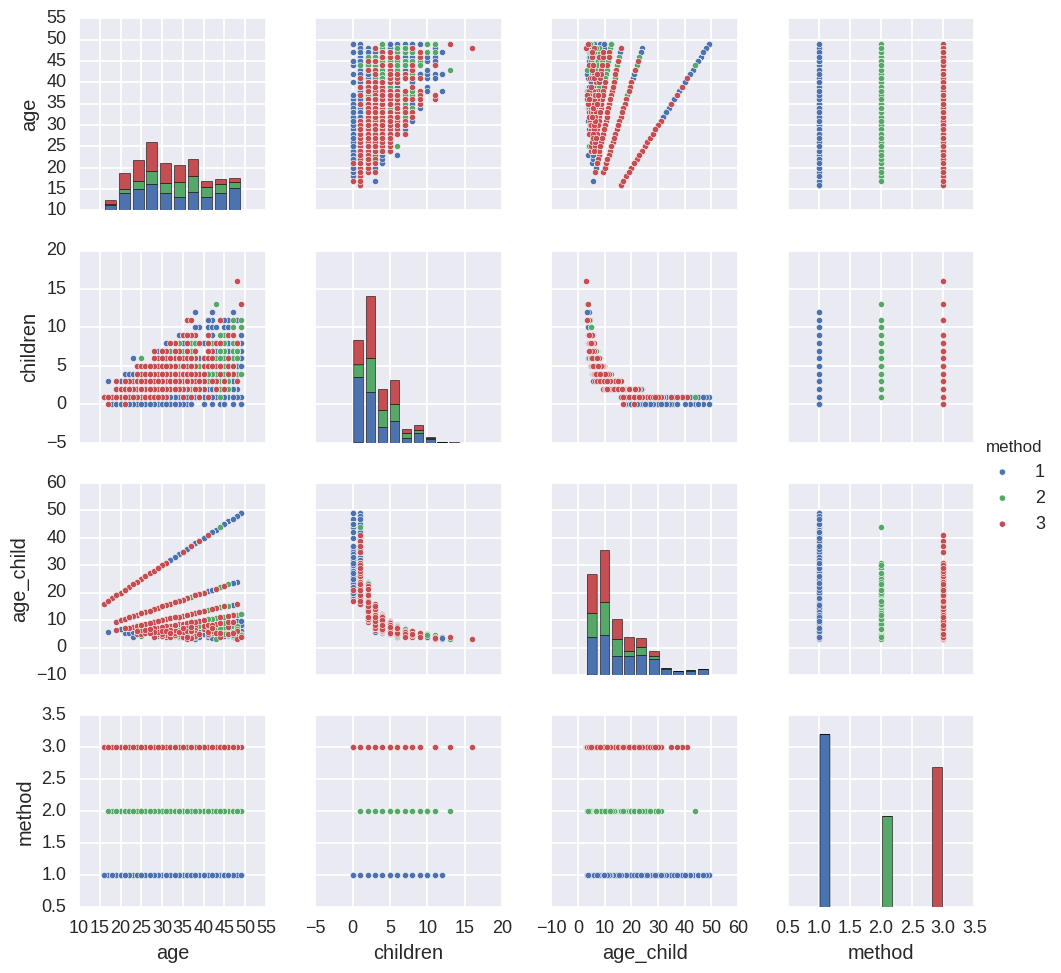

In [35]:
# et pour finir, un beau graphe
# permet de montrer la distribution de chaque colonne et
# la répartition des méthodes de contraception dans les data
sns.pairplot(cmc2[['age', 'children', 'age_child', 'method']], hue='method')

### Cas des colonnes "dummies"

On note cependant que les colonnes no. 1, 2 ,6, 7 sont des données catégorielles

* education
* husband's education
* husband's occupation
* standard-of-living

Pour certains modèles (e.g. Logistric Regression), on veut pouvoir transformer

|C|
|-|
|1|
|2|
|1|
|3|

en 

|C1 |C2 |C3 |
|---|---|---|
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 0 | 0 | 1 |

Les données du dernier tableau sont souvent appelées *dummies data*.

In [36]:
# Et on transforme ces données en *dummies* data
# exemple avec l'education (et on veut en ne garder que 3 sur quatre)
pd.get_dummies(cmc.education).head(10)

,1,2,3,4
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,0,1
6,0,1,0,0
7,0,0,1,0
8,0,1,0,0
9,1,0,0,0


## Flow People Count

http://archive.ics.uci.edu/ml/datasets/CalIt2+Building+People+Counts

**Data Set Information**:

   > Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

   > The purpose is to predict the presence of an event such as a conference in the building that is reflected by unusually high people counts for that day/time period. 

In [37]:
!head data/CalIt2.data

7,07/24/05,00:00:00,0
9,07/24/05,00:00:00,0
7,07/24/05,00:30:00,1
9,07/24/05,00:30:00,0
7,07/24/05,01:00:00,0
9,07/24/05,01:00:00,0
7,07/24/05,01:30:00,0
9,07/24/05,01:30:00,0
7,07/24/05,02:00:00,0
9,07/24/05,02:00:00,0


In [38]:
url_flow = "http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data"

In [39]:
# 4 colonnes
# flow_id: 7 pour les gens qui sortent
#          9 pour les gens qui entrent
flow_names = ["flow_id", "date", "time", "count"]

In [40]:
# lire les données
flow = pd.read_csv(url_flow, names=flow_names, header=None)

In [41]:
# premières lignes
flow.head()

,flow_id,date,time,count
0,7,07/24/05,00:00:00,0
1,9,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
3,9,07/24/05,00:30:00,0
4,7,07/24/05,01:00:00,0


In [42]:
# info
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 4 columns):
flow_id    10080 non-null int64
date       10080 non-null object
time       10080 non-null object
count      10080 non-null int64
dtypes: int64(2), object(2)
memory usage: 315.1+ KB


On va travailler un peu la donnée :

* `flow_id` : 7 pour une personne qui sort, 9 pour entre
* deux colonnes date & timestamp : ne faire qu'une date

### Flow ID

On veut avoir un truc un peu plus explicit que 7 ou 9

In [43]:
# on va créer une nouvelle colonnes qui dit "True" ou "False" pour les gens qui sortent
flow['out'] = flow['flow_id'] == 7
#flow['out'] = flow['flow_id'].apply(lambda x: x == 7)

In [44]:
flow.head()

,flow_id,date,time,count,out
0,7,07/24/05,00:00:00,0,True
1,9,07/24/05,00:00:00,0,False
2,7,07/24/05,00:30:00,1,True
3,9,07/24/05,00:30:00,0,False
4,7,07/24/05,01:00:00,0,True


In [45]:
# Exo : je veux compter le nombre total de gens 
# qui sont sortis et entrés de cet immeuble
# quelle méthode, sur quelle colonne ??
flow.groupby('out')['count'].sum()

out
False    19597
True     18837
Name: count, dtype: int64

### Date & Timestamp

* Qu'est-ce que sont les colonnes `date` et `time` ?
* Comment convertir en "vrai" date ?

In [46]:
# regardons de plus près 'date' et 'time'
# sélectionner la 10e ligne et voir ce que contiennent ces deux colonnes
flow.iloc[9].date, flow.iloc[9].time

('07/24/05', '02:00:00')

In [47]:
# on va concaténer ces deux chaînes et essayer de fabriquer une date
#    format de type 'MM/DD/YYThh:mm:ss'
# d, t = ??, ??
d, t = flow.iloc[9].date, flow.iloc[9].time
# concaténation ??

In [48]:
# création d'un Timestamp
# pd.Timestamp(??)
pd.Timestamp(d + 'T' + t)

Timestamp('2005-07-24 02:00:00')

On tente d'appliquer une fonction qui retourne un `Timestamp` pour l'affecter à une colonne.

In [49]:
# nouvelle colonne avec les "vraies" dates
flow['ts'] = flow.apply(lambda x: pd.Timestamp(x.date + 'T' + x.time), axis=1)

In [50]:
flow.head()

,flow_id,date,time,count,out,ts
0,7,07/24/05,00:00:00,0,True,2005-07-24 00:00:00
1,9,07/24/05,00:00:00,0,False,2005-07-24 00:00:00
2,7,07/24/05,00:30:00,1,True,2005-07-24 00:30:00
3,9,07/24/05,00:30:00,0,False,2005-07-24 00:30:00
4,7,07/24/05,01:00:00,0,True,2005-07-24 01:00:00


In [75]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
flow_id    10080 non-null int64
date       10080 non-null object
time       10080 non-null object
count      10080 non-null int64
out        10080 non-null bool
ts         10080 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 403.7+ KB


On veut potentiellement se débarrasser de colonnes `flow_id`, `date` et `time`. Et aussi passer la colonne de "vraies" dates en `Index`.

In [51]:
# enchainer des fonctions avec 'drop' et 'set_index'
flow.drop(['flow_id', 'date', 'time'], axis=1).set_index('ts').head()

,count,out
ts,,
2005-07-24 00:00:00,0,True
2005-07-24 00:00:00,0,False
2005-07-24 00:30:00,1,True
2005-07-24 00:30:00,0,False
2005-07-24 01:00:00,0,True


In [52]:
# mettre ça dans un nouvelle variable (drop & set_index renvoient des **copies**)
dflow = flow.drop(['flow_id', 'date', 'time'], axis=1).set_index('ts')

In [53]:
dflow.head()

,count,out
ts,,
2005-07-24 00:00:00,0,True
2005-07-24 00:00:00,0,False
2005-07-24 00:30:00,1,True
2005-07-24 00:30:00,0,False
2005-07-24 01:00:00,0,True


In [54]:
dflow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10080 entries, 2005-07-24 00:00:00 to 2005-11-05 23:30:00
Data columns (total 2 columns):
count    10080 non-null int64
out      10080 non-null bool
dtypes: bool(1), int64(1)
memory usage: 167.3 KB


### Analyse

Un peu de stats :

* combien de gens qui sortent / qui entrent
* moyenne des gens qui sortent / entrent

In [55]:
# compter les gens qui sortent / entrent
dflow.groupby('out')['count'].sum()

out
False    19597
True     18837
Name: count, dtype: int64

In [56]:
# moyenne des gens qui sortent / entrent
dflow.groupby('out')['count'].mean()

out
False    3.888294
True     3.737500
Name: count, dtype: float64

Et si on veut appliquer plusieurs fonctions d'aggrégation sur nos groupes : `agg`.

In [57]:
# on veut la moyenne, mais ausi la somme, mais aussi l'écart-type
dflow.groupby('out')['count'].agg(['mean', 'sum', 'std'])

,mean,sum,std
out,,,
False,3.888294,19597,6.834565
True,3.737500,18837,6.010372


Les fonctions marquées `'mean'` fonctionnent bien puisqu'elles sont connues de pandas (e.g. `df.mean()`). Pour tout autre fonction, lui passer la fonction et non pas une chaîne de caractères.

Et si on voulait regarder la somme où la moyenne par jour ?

...

ou toutes les 4 heures ?

In [58]:
# la méthode resample est votre amie
# on peut commencer par les gens qui sortent...
# day_out = ???
day_out = dflow.query("out").resample("1D").sum()['count']
# et qui entrent
# day_in = ???
day_in = dflow.query("not out").resample("1D").sum()['count']

In [59]:
day_out.head()

ts
2005-07-24     25
2005-07-25    162
2005-07-26    220
2005-07-27    230
2005-07-28    244
Freq: D, Name: count, dtype: int64

In [60]:
# distribution du nombre moyen de gens qui sortent
# sns.distplot ???

In [61]:
day = pd.DataFrame({"in": day_in,
                   "out": day_out})
day.head()

,in,out
ts,,
2005-07-24,16,25
2005-07-25,176,162
2005-07-26,217,220
2005-07-27,247,230
2005-07-28,271,244


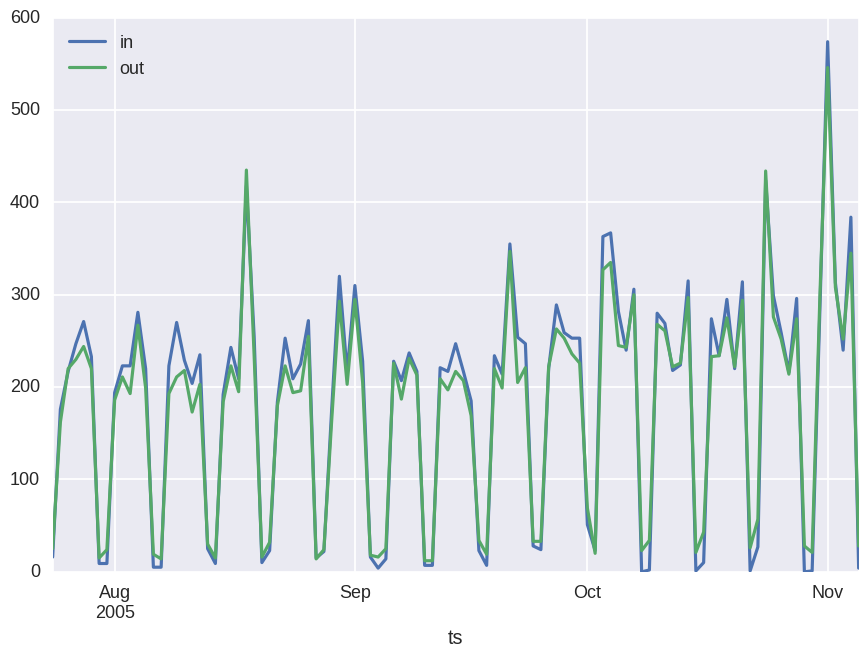

In [62]:
# tracer l'évolution, par jour, des gens qui sortent/entrent
day.plot()

Et toutes les 4 heures du coup ?

In [63]:
# essayer "4H" pour voir ??
dflow.query("out").resample("4H").sum()['count'].head(10)

ts
2005-07-24 00:00:00     3
2005-07-24 04:00:00     2
2005-07-24 08:00:00     2
2005-07-24 12:00:00     0
2005-07-24 16:00:00    11
2005-07-24 20:00:00     7
2005-07-25 00:00:00     1
2005-07-25 04:00:00     6
2005-07-25 08:00:00    29
2005-07-25 12:00:00    62
Freq: 4H, Name: count, dtype: int64

Et si on veut, on peut sommer, où calculer l'écart-type pour ces tranches de temps : 1 journée, 4 heures, ou même pourquoi pas toutes les semaines du mercredi au mardi.

In [64]:
# dflow.query("not out").resample('W-WED').sum()['count']

### Exo

Je veux un profil d'une journée (24 heures) pour les gens qui sortent et qui entrent. Par exemple le nombre total de personnes qui sont sortie par tranche horaire :

* 00-01h : 45
* 01-02h : 23
* ...
* 12-13h : 212
* ...

#### Échantillonner

In [65]:
# prennons dans un premier temps les gens qui entrent
# profile = ???
# note pour plus tard : j'ai envie que ça soit un DataFrame
#                       et aussi de remettre 'ts' dans une colonne
profile = (dflow.query("not out").resample("1H")['count']
           .sum()
           .to_frame()
           .reset_index())

In [66]:
profile[240:264]

,ts,count
240,2005-08-03 00:00:00,0
241,2005-08-03 01:00:00,0
242,2005-08-03 02:00:00,0
243,2005-08-03 03:00:00,0
244,2005-08-03 04:00:00,0
245,2005-08-03 05:00:00,1
246,2005-08-03 06:00:00,3
247,2005-08-03 07:00:00,5
248,2005-08-03 08:00:00,4
249,2005-08-03 09:00:00,12


#### "Tagger" les heures

In [67]:
# fonction qui, pour un timestamp donné, retourne l'heure de la journée

def hour(ts):
    return ts.hour

In [68]:
# nouvelle colonne
# profile['hour'] = ??
profile['hour'] = profile['ts'].apply(hour)

In [69]:
profile.head(24)

,ts,count,hour
0,2005-07-24 00:00:00,0,0
1,2005-07-24 01:00:00,0,1
2,2005-07-24 02:00:00,0,2
3,2005-07-24 03:00:00,0,3
4,2005-07-24 04:00:00,0,4
5,2005-07-24 05:00:00,0,5
6,2005-07-24 06:00:00,0,6
7,2005-07-24 07:00:00,3,7
8,2005-07-24 08:00:00,0,8
9,2005-07-24 09:00:00,2,9


#### Aggréger les données

... puis faire un beau graphe

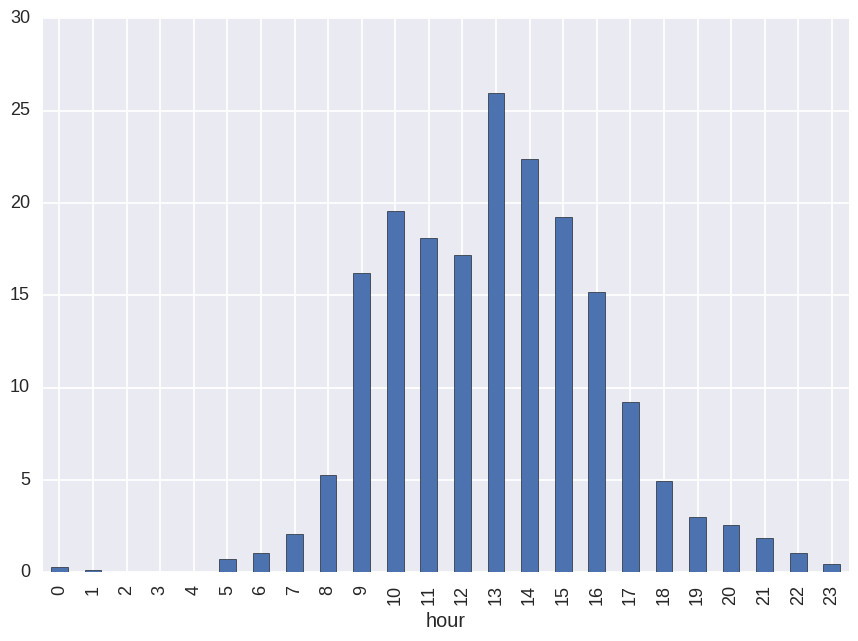

In [70]:
# on veut **grouper** par heure, on va faire un .... ??
profile.groupby("hour")['count'].mean().plot(kind='bar')

On peut faire la même chose avec `dflow.query("out")` et comparer.

### Pour finir, quelques courbes

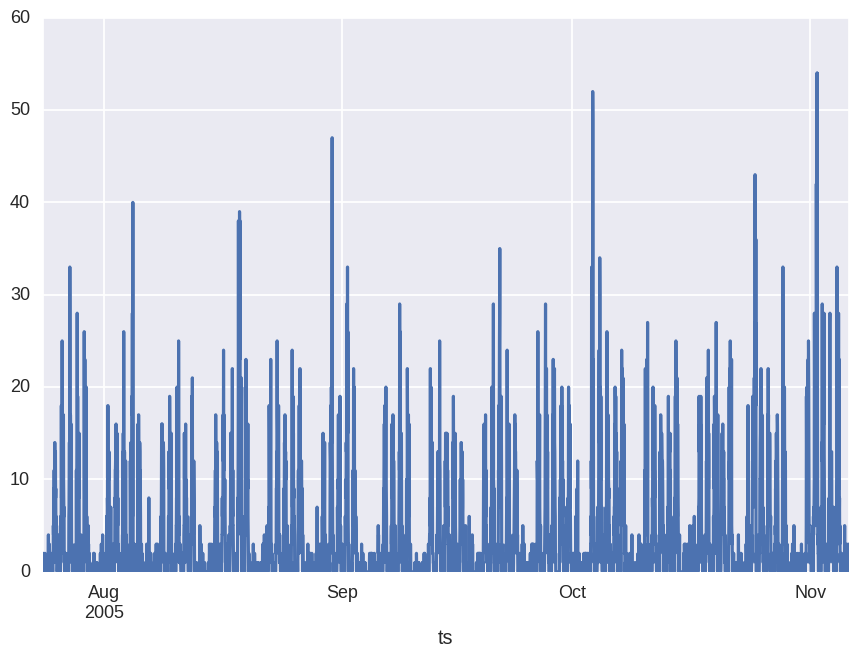

In [71]:
# Séries temporelles du nombre de personnes qui sortent
dflow.query('out')['count'].plot()

On peut vouloir **lisser** les courbes à forte variabilité : `rolling`. On calcule la moyenne glissante sur les K dernières valeurs.

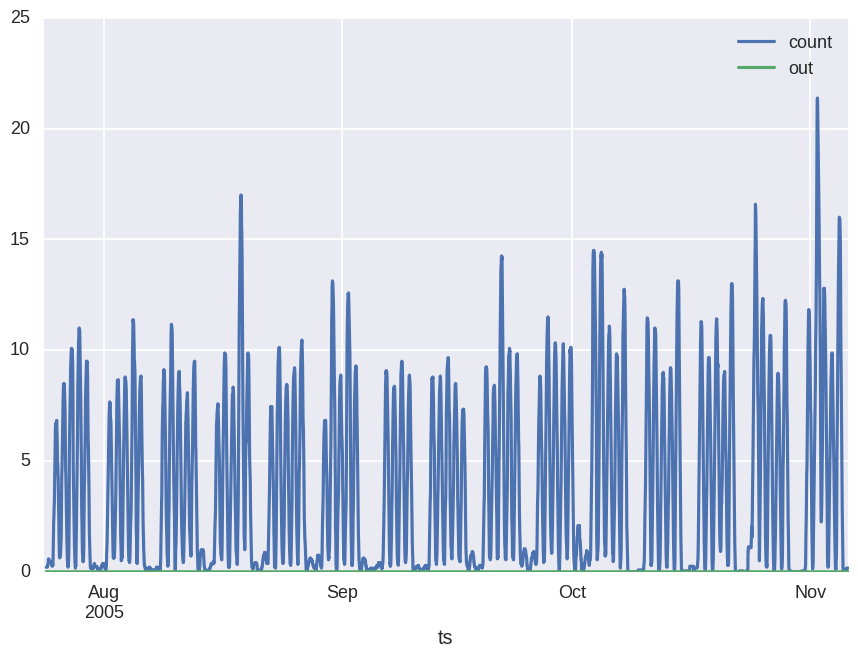

In [72]:
dflow.query('not out').rolling(24).mean().plot()

## Question(s) ??

Et merci de votre attention

![over](futurama-over.jpg)